In [101]:
import zipfile
import os

# Define the file path and extraction path
zip_file_path_new = 'mimic-iv.zip'
extraction_path_new = '/mimic-iv'

# Extract the zip file
with zipfile.ZipFile(zip_file_path_new, 'r') as zip_ref:
    zip_ref.extractall(extraction_path_new)

# List the extracted files to identify the dataset(s)
extracted_files_new = os.listdir(extraction_path_new)
extracted_files_new


['index.html',
 'hospunzipped',
 'README.txt',
 'SHA256SUMS.txt',
 'demo_subject_id.csv',
 'icuunzipped']

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Load the CSV files for processing
admissions_path_new = os.path.join(extraction_path_new, 'hospunzipped', 'admissions.csv')
patients_path_new = os.path.join(extraction_path_new, 'hospunzipped', 'patients.csv')
icustays_path_new = os.path.join(extraction_path_new, 'icuunzipped', 'icustays.csv')

admissions_df = pd.read_csv(admissions_path_new)
patients_df = pd.read_csv(patients_path_new)
icustays_df = pd.read_csv(icustays_path_new)

print("Admissions DataFrame:")
print(admissions_df.head())
print("\nPatients DataFrame:")
print(patients_df.head())
print("\nICUSTays DataFrame:")
print(icustays_df.head())

print("Admissions DataFrame Summary:")
print(admissions_df.describe(include='all'))

print("\nPatients DataFrame Summary:")
print(patients_df.describe(include='all'))

print("\nICUSTays DataFrame Summary:")
print(icustays_df.describe(include='all'))

Admissions DataFrame:
   subject_id   hadm_id            admittime            dischtime  \
0    10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
1    10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
2    10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
3    10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
4    10031404  21606243  2113-08-04 18:46:00  2113-08-06 20:57:00   

             deathtime admission_type admit_provider_id  \
0                  NaN         URGENT            P03YMR   
1                  NaN         URGENT            P41R5N   
2                  NaN         URGENT            P233F6   
3  2111-11-15 17:20:00         URGENT            P38TI6   
4                  NaN         URGENT            P07HDB   

       admission_location        discharge_location insurance language  \
0  TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  ENGLISH   
1  TRANSFER FROM HOSPITAL          HOME HEALTH CARE  Medicai

In [103]:

# ----------------------
# 1. Handling Missing Values
# ----------------------

print("Number of columns in Admissions: ", len(admissions_df))
# Check for missing values after imputation
missing_values = admissions_df.isnull().sum()

# Print the results
print("Missing Values before Imputation:")
print(missing_values)




Number of columns in Admissions:  275
Missing Values before Imputation:
subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64


In [104]:
# Impute missing values for categorical and numerical columns
categorical_cols_adm = admissions_df.select_dtypes(include=['object']).columns
numerical_cols_adm = admissions_df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values for categorical columns with "UNKNOWN"
admissions_df[categorical_cols_adm] = admissions_df[categorical_cols_adm].fillna('UNKNOWN')

# Fill missing values for numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
admissions_df[numerical_cols_adm] = imputer.fit_transform(admissions_df[numerical_cols_adm])

# Check for missing values after imputation
missing_values_after_imputation = admissions_df.isnull().sum()

# Print the results
print("Missing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values After Imputation:
subject_id              0
hadm_id                 0
admittime               0
dischtime               0
deathtime               0
admission_type          0
admit_provider_id       0
admission_location      0
discharge_location      0
insurance               0
language                0
marital_status          0
race                    0
edregtime               0
edouttime               0
hospital_expire_flag    0
dtype: int64


In [105]:
print(admissions_df.head())

   subject_id     hadm_id            admittime            dischtime  \
0  10004235.0  24181354.0  2196-02-24 14:38:00  2196-03-04 14:02:00   
1  10009628.0  25926192.0  2153-09-17 17:08:00  2153-09-25 13:20:00   
2  10018081.0  23983182.0  2134-08-18 02:02:00  2134-08-23 19:35:00   
3  10006053.0  22942076.0  2111-11-13 23:39:00  2111-11-15 17:20:00   
4  10031404.0  21606243.0  2113-08-04 18:46:00  2113-08-06 20:57:00   

             deathtime admission_type admit_provider_id  \
0              UNKNOWN         URGENT            P03YMR   
1              UNKNOWN         URGENT            P41R5N   
2              UNKNOWN         URGENT            P233F6   
3  2111-11-15 17:20:00         URGENT            P38TI6   
4              UNKNOWN         URGENT            P07HDB   

       admission_location        discharge_location insurance language  \
0  TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  ENGLISH   
1  TRANSFER FROM HOSPITAL          HOME HEALTH CARE  Medicaid        ?

In [106]:
admissions_df.dtypes

,0
subject_id,float64
hadm_id,float64
admittime,object
dischtime,object
deathtime,object
admission_type,object
admit_provider_id,object
admission_location,object
discharge_location,object
insurance,object


In [107]:
# Display data types of each column in the admissions DataFrame
admissions_df.dtypes if 'admissions_df' in locals() else "Dataset not loaded. Please confirm the correct file path or re-upload the data."


,0
subject_id,float64
hadm_id,float64
admittime,object
dischtime,object
deathtime,object
admission_type,object
admit_provider_id,object
admission_location,object
discharge_location,object
insurance,object


In [108]:
# Convert date columns to datetime format and extract meaningful features
date_columns = ['admittime', 'dischtime', 'deathtime', 'edregtime', 'edouttime']

# Ensure the columns are in datetime format
for col in date_columns:
    admissions_df[col] = pd.to_datetime(admissions_df[col], errors='coerce')

# Extract features from date columns
admissions_df['admit_year'] = admissions_df['admittime'].dt.year
admissions_df['admit_month'] = admissions_df['admittime'].dt.month
admissions_df['admit_day'] = admissions_df['admittime'].dt.day
admissions_df['admit_hour'] = admissions_df['admittime'].dt.hour
admissions_df['discharge_year'] = admissions_df['dischtime'].dt.year
admissions_df['discharge_month'] = admissions_df['dischtime'].dt.month
admissions_df['discharge_day'] = admissions_df['dischtime'].dt.day
admissions_df['discharge_hour'] = admissions_df['dischtime'].dt.hour
admissions_df['deathtime_year'] = admissions_df['dischtime'].dt.year
admissions_df['deathtime_month'] = admissions_df['dischtime'].dt.month
admissions_df['deathtime_day'] = admissions_df['dischtime'].dt.day
admissions_df['deathtime_hour'] = admissions_df['dischtime'].dt.hour
admissions_df['edregtime_year'] = admissions_df['dischtime'].dt.year
admissions_df['edregtime_month'] = admissions_df['dischtime'].dt.month
admissions_df['edregtime_day'] = admissions_df['dischtime'].dt.day
admissions_df['edregtime_hour'] = admissions_df['dischtime'].dt.hour
admissions_df['edouttime_year'] = admissions_df['dischtime'].dt.year
admissions_df['edouttime_month'] = admissions_df['dischtime'].dt.month
admissions_df['edouttime_day'] = admissions_df['dischtime'].dt.day
admissions_df['edouttime_hour'] = admissions_df['dischtime'].dt.hour

# Calculate length of stay (LOS) in hours
admissions_df['length_of_stay_hours'] = (
    admissions_df['dischtime'] - admissions_df['admittime']
).dt.total_seconds() / 3600

# Drop original datetime columns if no longer needed
admissions_df = admissions_df.drop(columns=date_columns)

# Display the first few rows of the transformed dataset
admissions_df.head()


<ipython-input-108-59ac32a40b80>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  admissions_df[col] = pd.to_datetime(admissions_df[col], errors='coerce')


,subject_id,hadm_id,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,...,deathtime_hour,edregtime_year,edregtime_month,edregtime_day,edregtime_hour,edouttime_year,edouttime_month,edouttime_day,edouttime_hour,length_of_stay_hours
0,10004235.0,24181354.0,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,...,14,2196,3,4,14,2196,3,4,14,215.400000
1,10009628.0,25926192.0,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,...,13,2153,9,25,13,2153,9,25,13,188.200000
2,10018081.0,23983182.0,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,...,19,2134,8,23,19,2134,8,23,19,137.550000
3,10006053.0,22942076.0,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,UNKNOWN,UNKNOWN,...,17,2111,11,15,17,2111,11,15,17,41.683333
4,10031404.0,21606243.0,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,...,20,2113,8,6,20,2113,8,6,20,50.183333


In [109]:
# Display data types of each column in the admissions DataFrame
admissions_df.dtypes if 'admissions_df' in locals() else "Dataset not loaded. Please confirm the correct file path or re-upload the data."


,0
subject_id,float64
hadm_id,float64
admission_type,object
admit_provider_id,object
admission_location,object
discharge_location,object
insurance,object
language,object
marital_status,object
race,object


In [110]:
# ----------------------
# 2. Feature Transformations
# ----------------------
# Apply One-Hot Encoding for selected categorical columns
categorical_cols_to_encode = admissions_df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Perform one-hot encoding on selected columns
encoded_features = pd.DataFrame(
    encoder.fit_transform(admissions_df[categorical_cols_to_encode]),
    columns=encoder.get_feature_names_out(categorical_cols_to_encode)
)

# Append encoded features and drop original categorical columns
admissions_encoded = pd.concat([admissions_df, encoded_features], axis=1).drop(columns=categorical_cols_to_encode)

# Display the first few rows of the transformed dataset
admissions_encoded.head()


,subject_id,hadm_id,hospital_expire_flag,admit_year,admit_month,admit_day,admit_hour,discharge_year,discharge_month,discharge_day,...,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - OTHER EUROPEAN
0,10004235.0,24181354.0,0.0,2196,2,24,14,2196,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10009628.0,25926192.0,0.0,2153,9,17,17,2153,9,25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10018081.0,23983182.0,0.0,2134,8,18,2,2134,8,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10006053.0,22942076.0,1.0,2111,11,13,23,2111,11,15,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10031404.0,21606243.0,0.0,2113,8,4,18,2113,8,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [113]:
print(admissions_encoded.columns)

Index(['subject_id', 'hadm_id', 'hospital_expire_flag', 'admit_year',
       'admit_month', 'admit_day', 'admit_hour', 'discharge_year',
       'discharge_month', 'discharge_day',
       ...
       'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN', 'race_OTHER',
       'race_PATIENT DECLINED TO ANSWER', 'race_PORTUGUESE',
       'race_UNABLE TO OBTAIN', 'race_UNKNOWN', 'race_WHITE',
       'race_WHITE - BRAZILIAN', 'race_WHITE - OTHER EUROPEAN'],
      dtype='object', length=240)


In [115]:
# Standard Scaling for numerical columns
scaler = StandardScaler()
admissions_encoded[admissions_encoded.columns] = scaler.fit_transform(admissions_encoded[admissions_encoded.columns])

In [116]:
admissions_encoded.head()

,subject_id,hadm_id,hospital_expire_flag,admit_year,admit_month,admit_day,admit_hour,discharge_year,discharge_month,discharge_day,...,race_HISPANIC/LATINO - PUERTO RICAN,race_HISPANIC/LATINO - SALVADORAN,race_OTHER,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - OTHER EUROPEAN
0,-1.211540,-0.327055,-0.240192,1.728158,-1.420158,1.059192,0.063106,1.728280,-1.123444,-1.403714,...,-0.060412,-0.105021,-0.121491,-0.085592,-0.161615,-0.121491,-0.256693,-1.272418,-0.105021,-0.085592
1,-0.766048,0.274149,-0.240192,0.003209,0.669906,0.216305,0.469845,0.002481,0.677997,1.085981,...,16.552945,-0.105021,-0.121491,-0.085592,-0.161615,-0.121491,-0.256693,-1.272418,-0.105021,-0.085592
2,-0.067781,-0.395337,-0.240192,-0.758977,0.371326,0.336717,-1.563849,-0.760081,0.377757,0.848867,...,-0.060412,-0.105021,-0.121491,-0.085592,-0.161615,-0.121491,-0.256693,0.785905,-0.105021,-0.085592
3,-1.061363,-0.754062,4.163332,-1.681624,1.267067,-0.265345,1.283323,-1.683183,1.278477,-0.099588,...,-0.060412,-0.105021,-0.121491,-0.085592,-0.161615,-0.121491,3.895699,-1.272418,-0.105021,-0.085592
4,1.032775,-1.214338,-0.240192,-1.601394,0.371326,-1.349058,0.605425,-1.602913,0.377757,-1.166600,...,-0.060412,-0.105021,-0.121491,-0.085592,-0.161615,-0.121491,-0.256693,0.785905,-0.105021,-0.085592


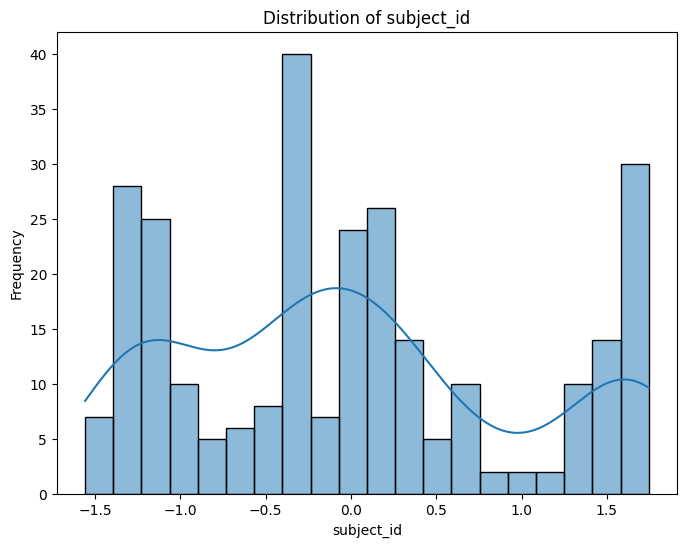

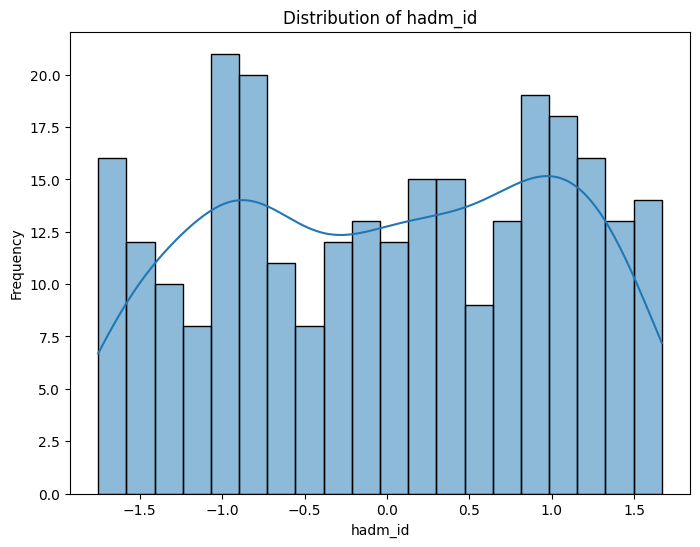

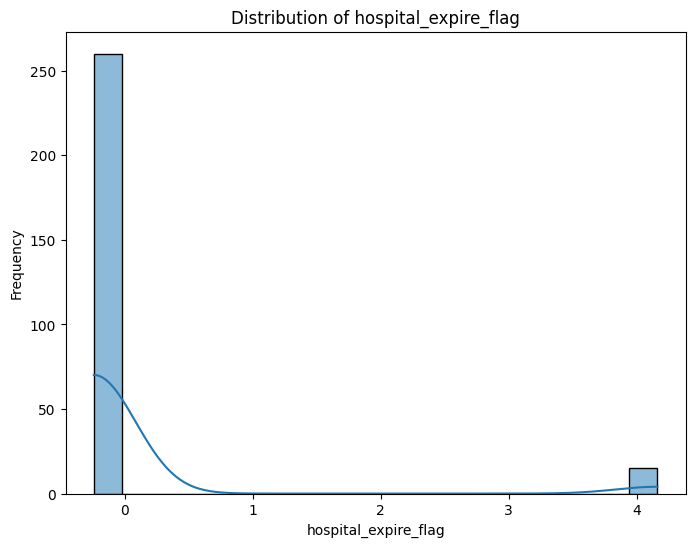

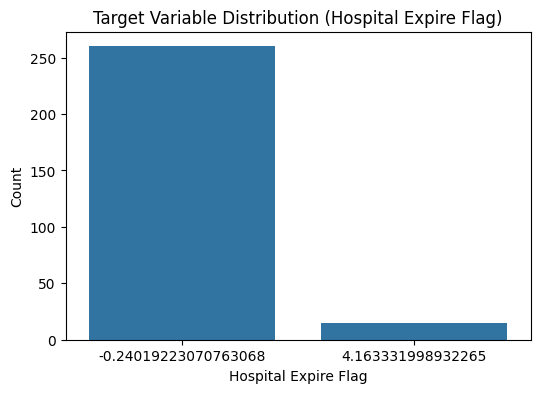

In [117]:

# ----------------------
# 3. Exploratory Data Analysis (EDA)
# ----------------------

# Distribution plots for numerical features
for col in numerical_cols_adm:
    plt.figure(figsize=(8, 6))
    sns.histplot(admissions_encoded[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Target variable distribution (e.g., 'hospital_expire_flag')
plt.figure(figsize=(6, 4))
sns.countplot(x=admissions_encoded['hospital_expire_flag'])
plt.title('Target Variable Distribution (Hospital Expire Flag)')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Count')
plt.show()



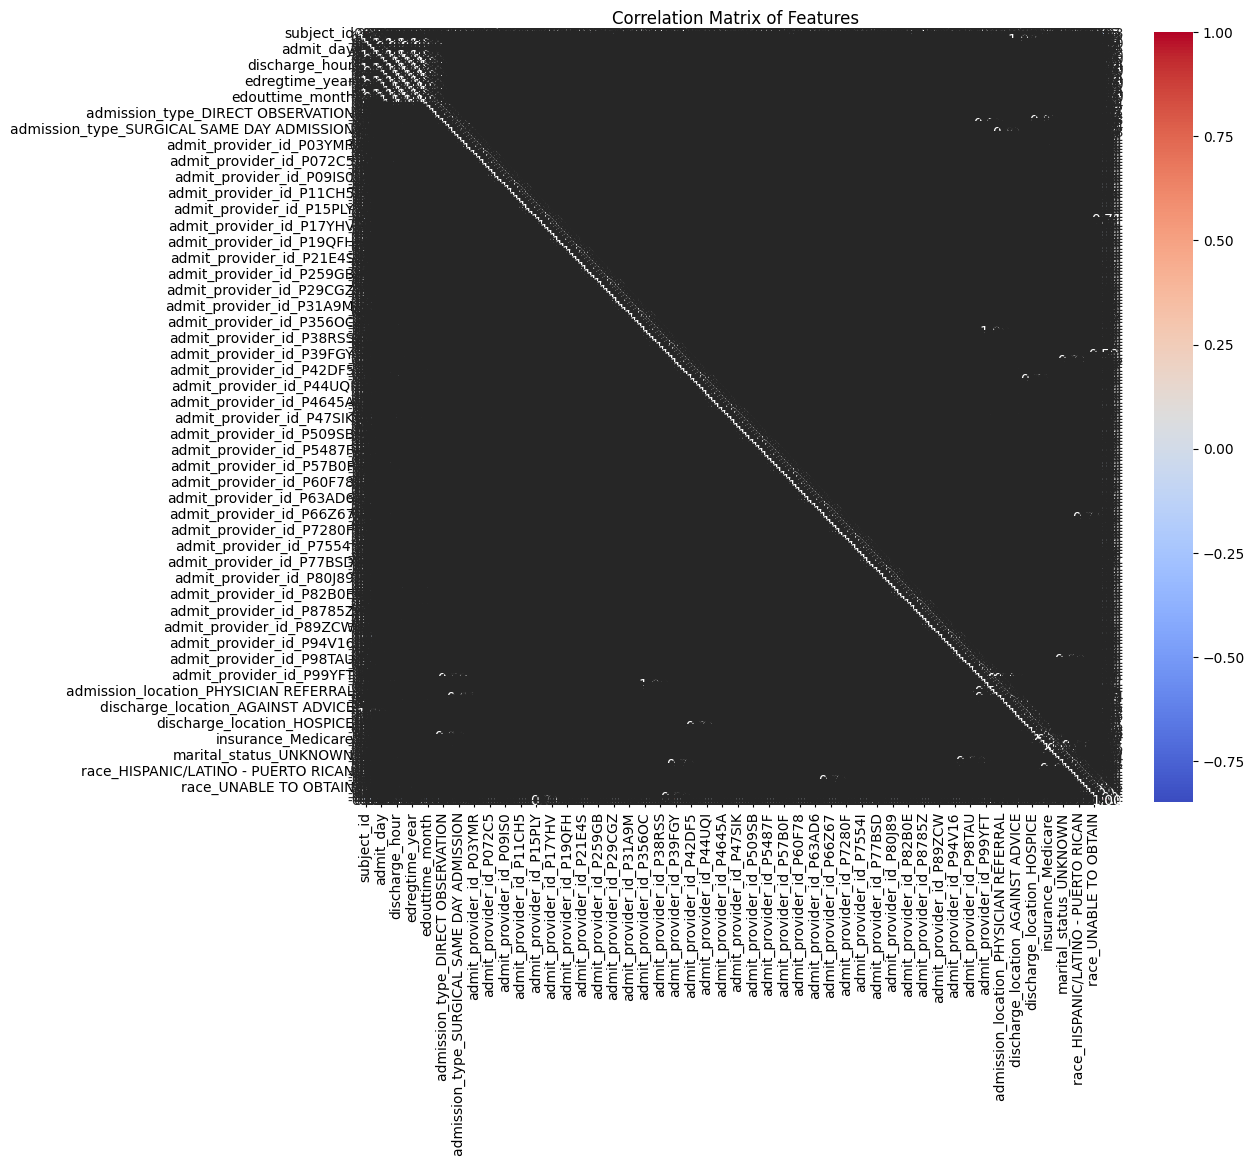

Correlation of features with the target variable (hospital_expire_flag):
discharge_location_DIED                         1.000000
hospital_expire_flag                            1.000000
admit_provider_id_P48GIG                        0.356348
admit_provider_id_P01LRQ                        0.356348
admission_location_INFORMATION NOT AVAILABLE    0.251516
                                                  ...   
discharge_location_HOME HEALTH CARE            -0.148436
discharge_hour                                 -0.260719
edouttime_hour                                 -0.260719
edregtime_hour                                 -0.260719
deathtime_hour                                 -0.260719
Name: hospital_expire_flag, Length: 240, dtype: float64


In [118]:

# Correlation matrix of features
correlation_matrix = admissions_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Correlation of features with target variable
target_correlation = correlation_matrix['hospital_expire_flag'].sort_values(ascending=False)
print("Correlation of features with the target variable (hospital_expire_flag):")
print(target_correlation)

In [120]:

# ----------------------
# 4. Addressing Class Imbalance
# ----------------------

# Check the distribution of the target variable
target_counts = admissions_encoded['hospital_expire_flag'].value_counts()
print("Target Variable Distribution Before Balancing:")
print(target_counts)

# Oversampling the minority class
majority_class = admissions_encoded[admissions_encoded['hospital_expire_flag'] == 0]
minority_class = admissions_encoded[admissions_encoded['hospital_expire_flag'] == 1]

# Oversample minority class
minority_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine to form a balanced dataset
admissions_balanced = pd.concat([majority_class, minority_oversampled])

# Plot the balanced target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=admissions_balanced['hospital_expire_flag'])
plt.title('Balanced Target Variable Distribution')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Count')
plt.show()

Target Variable Distribution Before Balancing:
hospital_expire_flag
-0.240192    260
 4.163332     15
Name: count, dtype: int64


InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.